# Data Access + Retrieval

## AWS Access Tokens

In [34]:
# from peakPredictAccess import PeakPredictAccess
import peakPredictAccess
from stravaApi import StravaApi
import os
from dotenv import load_dotenv

AWS_ACCESS_KEY=os.getenv("AWS_ACCESS_KEY")
AWS_SECRET_KEY=os.getenv("AWS_SECRET_KEY")
C2_CLIENT_ID=os.getenv("C2_CLIENT_ID")
C2_CLIENT_SECRET=os.getenv("C2_CLIENT_SECRET")
STRAVA_CLIENT_ID=os.getenv("STRAVA_CLIENT_ID")
STRAVA_CLIENT_SECRET=os.getenv("STRAVA_CLIENT_SECRET")


In [35]:
# reload imported modules
from importlib import reload
# reload(SportsCalculators) 
reload(peakPredictAccess)
# reload(StravaApi)

<module 'peakPredictAccess' from '/Users/liam/Documents/dev/tcd-finalyear/final-year-project/data-analysis/peakPredictAccess.py'>

In [36]:
LJStravaUserID = "32811115"

In [37]:
accesor = peakPredictAccess.Accessor(
    AWS_ACCESS_KEY,
    AWS_SECRET_KEY,
    C2_CLIENT_ID,
    C2_CLIENT_SECRET,
    STRAVA_CLIENT_ID,
    STRAVA_CLIENT_SECRET
)
strava_token = accesor.getUpdatedAccessToken(LJStravaUserID, "Strava")

ValueError: C2 Client ID not provided

## Strava API

In [ ]:
stravaApi = StravaApi(strava_token['access_token'])
activities = stravaApi.getStravaUserActivities()

# Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import json
import SportsCalculators
import datetime as dt

In [ ]:
# Save RawJSON for reproducibility
import json
with open('activities'+str(round(dt.datetime.now().timestamp())) +'.json', 'w') as f:
    json.dump(activities.json(), f)

In [38]:
# load saved data
import json
activites =json.load(open('activities.json'))

## Data Cleaning

In [39]:
athleteInfo = {
  "name": "Liam",
  "weight": 82,
  "maxHr": 195,
  "restHr": 42
}

In [40]:
rawDataset = pd.json_normalize(activities.json())
rawDataset.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,max_watts,weighted_average_watts,kilojoules,device_watts,workout_type
0,2,JustGo-10624M,10598.0,2732,2747,6.5,Rowing,Rowing,11127215198,2024-04-07T10:17:25Z,...,1,a11127215198,ycrdI|jqe@f@dB`@lAb@jB\jBlBhNHzAJhEE`CGz@eBlLq...,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10000m row,10000.0,2253,2253,0.0,Rowing,Rowing,11117235936,2024-04-06T09:19:27Z,...,1,a11117235936,,2,242.3,328.0,243.0,545.8,True,NaN
2,2,8x500m/2:00r row,4663.7,1604,1604,0.0,Rowing,Rowing,11106299718,2024-04-04T16:43:15Z,...,1,a11106299718,,2,250.8,548.0,280.0,402.2,True,NaN
3,2,JustGo-20123M,20121.1,5999,5999,16.5,Rowing,Rowing,11100621343,2024-04-03T16:10:10Z,...,1,a11100621343,sdrdIhhqe@?aBYeIC}BA_CHcE@eBEaAMyADCBBBZZdFPvI...,2,NaN,NaN,NaN,NaN,NaN,NaN
4,2,16000m row,16000.0,3745,3745,0.0,Rowing,Rowing,11093106551,2024-04-02T18:22:35Z,...,1,a11093106551,,2,216.9,496.0,218.0,812.3,True,NaN


In [41]:
rawDataset.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'id', 'start_date',
       'start_date_local', 'timezone', 'utc_offset', 'location_city',
       'location_state', 'location_country', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'trainer', 'commute', 'manual', 'private', 'visibility', 'flagged',
       'gear_id', 'start_latlng', 'end_latlng', 'average_speed', 'max_speed',
       'average_cadence', 'has_heartrate', 'average_heartrate',
       'max_heartrate', 'heartrate_opt_out', 'display_hide_heartrate_option',
       'elev_high', 'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'suffer_score', 'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_polyline', 'map.resource_state', 'average_watts',
       'max_watts', 'weighted_average_watts', 'kilojou

Reducing the number of columns to more manageble ones, if we need more data we can use the ids to refer back

In [42]:
df = rawDataset[['name', 'distance', 'moving_time', 'elapsed_time', 'sport_type', 'id', 'start_date', 'average_heartrate', 'average_watts', "has_heartrate", 'average_speed', 'trainer']]
df.head()

,name,distance,moving_time,elapsed_time,sport_type,id,start_date,average_heartrate,average_watts,has_heartrate,average_speed,trainer
0,JustGo-10624M,10598.0,2732,2747,Rowing,11127215198,2024-04-07T10:17:25Z,135.6,NaN,True,3.879,False
1,10000m row,10000.0,2253,2253,Rowing,11117235936,2024-04-06T09:19:27Z,163.7,242.3,True,4.439,True
2,8x500m/2:00r row,4663.7,1604,1604,Rowing,11106299718,2024-04-04T16:43:15Z,153.2,250.8,True,2.908,True
3,JustGo-20123M,20121.1,5999,5999,Rowing,11100621343,2024-04-03T16:10:10Z,155.1,NaN,True,3.354,False
4,16000m row,16000.0,3745,3745,Rowing,11093106551,2024-04-02T18:22:35Z,153.3,216.9,True,4.272,True


Calculating time in zones (basic version just calculates zone and uses moving time as time in zone)

In [43]:
# Setup zone classifier
zoneClassifier = SportsCalculators.ZoneClassifier(athleteInfo['maxHr'], athleteInfo['restHr'])

In [44]:
testDf = pd.DataFrame(df)

In [45]:
# adding zone time for each zone (more advanced method can be used)
for i in np.arange(5):
  # print(i+1)
  df['zone'+str(i+1)+'_time'] = df.apply(lambda row: zoneClassifier.calculateZoneTime(row['average_heartrate'], i+1, row['moving_time']), axis=1).fillna(0)

/var/folders/3x/7qtdp9gd4t96285blt4dfmnc0000gp/T/ipykernel_46549/3077786068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'+str(i+1)+'_time'] = df.apply(lambda row: zoneClassifier.calculateZoneTime(row['average_heartrate'], i+1, row['moving_time']), axis=1).fillna(0)
/var/folders/3x/7qtdp9gd4t96285blt4dfmnc0000gp/T/ipykernel_46549/3077786068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zone'+str(i+1)+'_time'] = df.apply(lambda row: zoneClassifier.calculateZoneTime(row['average_heart

In [46]:
# Calculate Training Impulse for each session
df['trimp'] = df.moving_time/60 * df.average_heartrate.fillna(0)

/var/folders/3x/7qtdp9gd4t96285blt4dfmnc0000gp/T/ipykernel_46549/2985940968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trimp'] = df.moving_time/60 * df.average_heartrate.fillna(0)


In [47]:
df.head()

,name,distance,moving_time,elapsed_time,sport_type,id,start_date,average_heartrate,average_watts,has_heartrate,average_speed,trainer,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp
0,JustGo-10624M,10598.0,2732,2747,Rowing,11127215198,2024-04-07T10:17:25Z,135.6,NaN,True,3.879,False,0.0,2732.0,0.0,0.0,0.0,6174.320000
1,10000m row,10000.0,2253,2253,Rowing,11117235936,2024-04-06T09:19:27Z,163.7,242.3,True,4.439,True,0.0,0.0,2253.0,0.0,0.0,6146.935000
2,8x500m/2:00r row,4663.7,1604,1604,Rowing,11106299718,2024-04-04T16:43:15Z,153.2,250.8,True,2.908,True,0.0,0.0,1604.0,0.0,0.0,4095.546667
3,JustGo-20123M,20121.1,5999,5999,Rowing,11100621343,2024-04-03T16:10:10Z,155.1,NaN,True,3.354,False,0.0,0.0,5999.0,0.0,0.0,15507.415000
4,16000m row,16000.0,3745,3745,Rowing,11093106551,2024-04-02T18:22:35Z,153.3,216.9,True,4.272,True,0.0,0.0,3745.0,0.0,0.0,9568.475000


In [48]:
df['start_date'] = pd.to_datetime(df['start_date'])

/var/folders/3x/7qtdp9gd4t96285blt4dfmnc0000gp/T/ipykernel_46549/474565957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_date'] = pd.to_datetime(df['start_date'])


### Session Classification + Analysis

In [49]:
def identifyModality(row):
  if row['sport_type'] != "Rowing":
    return "other"
  else:
    if row['trainer'] == True:
      return "erg"
    else: 
      return "row"


In [50]:
modalityDf = pd.DataFrame(df)
modalities = ['erg', 'row', 'other']
modalityDf['modality'] = modalityDf.apply(lambda row: identifyModality(row), axis=1).fillna(0)
for modality in modalities:
  modalityDf[modality] = np.where(modalityDf['modality'] == modality, 1, 0)
modalityDf.head()

,name,distance,moving_time,elapsed_time,sport_type,id,start_date,average_heartrate,average_watts,has_heartrate,...,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,modality,erg,row,other
0,JustGo-10624M,10598.0,2732,2747,Rowing,11127215198,2024-04-07 10:17:25+00:00,135.6,NaN,True,...,0.0,2732.0,0.0,0.0,0.0,6174.320000,row,0,1,0
1,10000m row,10000.0,2253,2253,Rowing,11117235936,2024-04-06 09:19:27+00:00,163.7,242.3,True,...,0.0,0.0,2253.0,0.0,0.0,6146.935000,erg,1,0,0
2,8x500m/2:00r row,4663.7,1604,1604,Rowing,11106299718,2024-04-04 16:43:15+00:00,153.2,250.8,True,...,0.0,0.0,1604.0,0.0,0.0,4095.546667,erg,1,0,0
3,JustGo-20123M,20121.1,5999,5999,Rowing,11100621343,2024-04-03 16:10:10+00:00,155.1,NaN,True,...,0.0,0.0,5999.0,0.0,0.0,15507.415000,row,0,1,0
4,16000m row,16000.0,3745,3745,Rowing,11093106551,2024-04-02 18:22:35+00:00,153.3,216.9,True,...,0.0,0.0,3745.0,0.0,0.0,9568.475000,erg,1,0,0


In [51]:
df = pd.DataFrame(modalityDf)

### Generating daily, weekly, and monthly summary dataframes

In [52]:
def generateSummary(df, freq="D", key="start_date", sumColumns=['distance', 'moving_time', 'elapsed_time', 'zone1_time', 'zone2_time', 'zone3_time', 'zone4_time', 'zone5_time', 'trimp', 'erg', 'row', 'other']):
  # sumColumns = 
  # valueCountColumns = ['modality']
  grouped = df.groupby(pd.Grouper(key=key, freq=freq)) 
  sumDf = grouped[sumColumns].sum()
  # valCountDf = grouped[valueCountColumns].value_counts()

  return sumDf.reset_index()


In [53]:
tmpDf = generateSummary(modalityDf, freq="W")

In [54]:
tmpDf.tail()

,start_date,distance,moving_time,elapsed_time,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,erg,row,other
17,2024-03-10 00:00:00+00:00,54980.2,14197,14308,6869.0,3147.0,4181.0,0.0,0.0,32812.598333,0,4,0
18,2024-03-17 00:00:00+00:00,80169.0,21118,21391,0.0,19706.0,1412.0,0.0,0.0,48605.475000,1,5,0
19,2024-03-24 00:00:00+00:00,38377.1,9862,9877,4415.0,4260.0,0.0,1187.0,0.0,23415.478333,0,4,0
20,2024-03-31 00:00:00+00:00,72951.0,19329,19329,4557.0,6924.0,7848.0,0.0,0.0,46521.003333,1,4,0
21,2024-04-07 00:00:00+00:00,79277.6,20990,21108,0.0,7389.0,13601.0,0.0,0.0,52126.175000,3,3,0


In [55]:
sumColumns = ['distance', 'moving_time', 'elapsed_time', 'zone1_time', 'zone2_time', 'zone3_time', 'zone4_time', 'zone5_time', 'trimp']
dailyDf = generateSummary(df)
weeklyDf = generateSummary(df, freq="W")
monthlyDf = generateSummary(df, freq="MS")

In [98]:
dailyDf.to_json('daily.json', orient='records')
weeklyDf.to_json('weekly.json', orient='records')
monthlyDf.to_json('monthly.json', orient='records')

In [56]:
dailyDf.tail()

,start_date,distance,moving_time,elapsed_time,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,erg,row,other
148,2024-04-03 00:00:00+00:00,20121.1,5999,5999,0.0,0.0,5999.0,0.0,0.0,15507.415000,0,1,0
149,2024-04-04 00:00:00+00:00,4663.7,1604,1604,0.0,0.0,1604.0,0.0,0.0,4095.546667,1,0,0
150,2024-04-05 00:00:00+00:00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0
151,2024-04-06 00:00:00+00:00,10000.0,2253,2253,0.0,0.0,2253.0,0.0,0.0,6146.935000,1,0,0
152,2024-04-07 00:00:00+00:00,10598.0,2732,2747,0.0,2732.0,0.0,0.0,0.0,6174.320000,0,1,0


In [57]:
weeklyDf.tail()

,start_date,distance,moving_time,elapsed_time,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,erg,row,other
17,2024-03-10 00:00:00+00:00,54980.2,14197,14308,6869.0,3147.0,4181.0,0.0,0.0,32812.598333,0,4,0
18,2024-03-17 00:00:00+00:00,80169.0,21118,21391,0.0,19706.0,1412.0,0.0,0.0,48605.475000,1,5,0
19,2024-03-24 00:00:00+00:00,38377.1,9862,9877,4415.0,4260.0,0.0,1187.0,0.0,23415.478333,0,4,0
20,2024-03-31 00:00:00+00:00,72951.0,19329,19329,4557.0,6924.0,7848.0,0.0,0.0,46521.003333,1,4,0
21,2024-04-07 00:00:00+00:00,79277.6,20990,21108,0.0,7389.0,13601.0,0.0,0.0,52126.175000,3,3,0


In [58]:
monthlyDf

,start_date,distance,moving_time,elapsed_time,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,erg,row,other
0,2023-11-01 00:00:00+00:00,175122.0,46672,46783,14100.0,19371.0,3337.0,0.0,9864.0,89121.686667,5,6,0
1,2023-12-01 00:00:00+00:00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0
2,2024-01-01 00:00:00+00:00,369764.6,101474,101962,11872.0,43894.0,15117.0,331.0,30260.0,169365.208333,16,17,0
3,2024-02-01 00:00:00+00:00,373867.4,94449,101493,21737.0,39534.0,12407.0,0.0,20771.0,167672.465000,2,25,1
4,2024-03-01 00:00:00+00:00,269701.7,70164,70651,18657.0,35636.0,13441.0,2430.0,0.0,164732.955000,2,20,0
5,2024-04-01 00:00:00+00:00,79277.6,20990,21108,0.0,7389.0,13601.0,0.0,0.0,52126.175000,3,3,0


## Basic Analysis

### Training Overview

In [59]:
last3WeekRollingAverage = weeklyDf[['distance','elapsed_time', 'zone1_time','zone2_time', 'zone3_time', 'zone4_time','zone5_time']].rolling(window=3).mean()
# Get the last week's mileage
last_week_mileage = weeklyDf['distance'].iloc[-1]
last_week_time = weeklyDf['elapsed_time'].iloc[-1]

# Get the last 3-week rolling average
last_3_week_average_mileage = last3WeekRollingAverage['distance'].iloc[-1]
last_3_week_average_time = last3WeekRollingAverage['elapsed_time'].iloc[-1]

distanceTrend = "-"
durationTrend = "-"
# # Add icons indicating if the last week's mileage is more or less than the average
if last_week_mileage > last_3_week_average_mileage:
  distanceTrend="↑"
elif last_week_mileage < last_3_week_average_mileage:
  distanceTrend="↓"

if last_week_time > last_3_week_average_time:
  durationTrend="↑"
elif last_week_time < last_3_week_average_time:
  durationTrend="↓"

print("Mileage last week: " + str(round(last_week_mileage/1000, 2)) + "km, trending " + distanceTrend + " compared to the rolling average of the last 3 weeks")
print("Duration last week: " + str(round(last_week_time/60, 2)) + "min, trending " + durationTrend + " compared to the rolling average of the last 3 weeks")

Mileage last week: 79.28km, trending ↑ compared to the rolling average of the last 3 weeks
Duration last week: 351.8min, trending ↑ compared to the rolling average of the last 3 weeks


### ACWR Calculation
Done on daily data, not super useful when looked at over longer periods (ie. I'm too lazy to do the calculations)

In [60]:
acwrDaily = pd.DataFrame(dailyDf)
acwrDaily['acute'] = dailyDf.rolling(7)['trimp'].mean().fillna(0)
acwrDaily['chronic'] = dailyDf.rolling(28)["trimp"].mean().fillna(0)
acwrDaily['acwr'] = (acwrDaily['acute'] / acwrDaily['chronic']).fillna(0)
acwrDaily.tail()

,start_date,distance,moving_time,elapsed_time,zone1_time,zone2_time,zone3_time,zone4_time,zone5_time,trimp,erg,row,other,acute,chronic,acwr
148,2024-04-03 00:00:00+00:00,20121.1,5999,5999,0.0,0.0,5999.0,0.0,0.0,15507.415000,0,1,0,11747.196667,6411.403095,1.832235
149,2024-04-04 00:00:00+00:00,4663.7,1604,1604,0.0,0.0,1604.0,0.0,0.0,4095.546667,1,0,0,11274.178333,6557.672619,1.719235
150,2024-04-05 00:00:00+00:00,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,9854.998333,6304.090952,1.563270
151,2024-04-06 00:00:00+00:00,10000.0,2253,2253,0.0,0.0,2253.0,0.0,0.0,6146.935000,1,0,0,8343.639286,6148.080952,1.357113
152,2024-04-07 00:00:00+00:00,10598.0,2732,2747,0.0,2732.0,0.0,0.0,0.0,6174.320000,0,1,0,7446.596429,6095.290417,1.221697


In [99]:
acwrDaily.to_json("acwrDaily.json", orient='records')

### Modality Analysis
Calculating % of training done in each modality

In [61]:
modalitySumm = df.groupby(['modality', 'start_date'])[['moving_time', 'distance']].sum().reset_index()
dayModalitySumm = modalitySumm.groupby(['modality', pd.Grouper(key='start_date', freq='D')]).sum().reset_index()
dayModalitySumm.tail()

,modality,start_date,moving_time,distance
71,row,2024-03-30 00:00:00+00:00,6924,22242.5
72,row,2024-03-31 00:00:00+00:00,4903,20703.9
73,row,2024-04-01 00:00:00+00:00,4657,17894.8
74,row,2024-04-03 00:00:00+00:00,5999,20121.1
75,row,2024-04-07 00:00:00+00:00,2732,10598.0


In [62]:
dayModalitySumm.iloc[dayModalitySumm.loc[dayModalitySumm["modality"].isin(["erg", "row"])]['distance'].idxmax()]

modality                             row
start_date     2024-02-10 00:00:00+00:00
moving_time                         9891
distance                         36953.6
Name: 44, dtype: object

Calculating Weekly Percentage of training (time) completed in each modality

In [63]:
weeklyModalitySumm = df.groupby(['modality', pd.Grouper(key="start_date", freq="W")])[['moving_time', 'distance']].sum().reset_index()
weeklyModalitySumm.tail()

,modality,start_date,moving_time,distance
24,row,2024-03-10 00:00:00+00:00,14197,54980.2
25,row,2024-03-17 00:00:00+00:00,19706,74183.1
26,row,2024-03-24 00:00:00+00:00,9862,38377.1
27,row,2024-03-31 00:00:00+00:00,16384,60949.4
28,row,2024-04-07 00:00:00+00:00,13388,48613.9


In [64]:
weeklyModDist = pd.pivot_table(weeklyModalitySumm, values='distance', index='start_date', columns='modality').fillna(0).reset_index()
weeklyModDist['total'] = weeklyModDist['erg'] + weeklyModDist['row'] + weeklyModDist['other']
weeklyModTime = pd.pivot_table(weeklyModalitySumm, values='moving_time', index='start_date', columns='modality').fillna(0).reset_index()
weeklyModTime['total'] = weeklyModTime['erg'] + weeklyModTime['row'] + weeklyModTime['other']

In [65]:
weeklyModDist.tail()

modality,start_date,erg,other,row,total
12,2024-03-10 00:00:00+00:00,0.0,0.0,54980.2,54980.2
13,2024-03-17 00:00:00+00:00,5985.9,0.0,74183.1,80169.0
14,2024-03-24 00:00:00+00:00,0.0,0.0,38377.1,38377.1
15,2024-03-31 00:00:00+00:00,12001.6,0.0,60949.4,72951.0
16,2024-04-07 00:00:00+00:00,30663.7,0.0,48613.9,79277.6


In [66]:
weeklyModTime.tail()

modality,start_date,erg,other,row,total
12,2024-03-10 00:00:00+00:00,0.0,0.0,14197.0,14197.0
13,2024-03-17 00:00:00+00:00,1412.0,0.0,19706.0,21118.0
14,2024-03-24 00:00:00+00:00,0.0,0.0,9862.0,9862.0
15,2024-03-31 00:00:00+00:00,2945.0,0.0,16384.0,19329.0
16,2024-04-07 00:00:00+00:00,7602.0,0.0,13388.0,20990.0


In [68]:
from datetime import datetime


def printModalitySummary(weeklyDf, weeklyModDistDf, weeklyModTimeDf):
    print("Weekly Modality Summary, week of", str(
        weeklyDf["start_date"].strftime("%x")))
    weeklySessionTotal = weeklyDf['erg'].sum(
    ) + weeklyDf['row'].sum() + weeklyDf['other'].sum()
    print('Session Count:\n'+str(weeklyDf['erg'].sum()) + " erg, " + str(weeklyDf['row'].sum(
    )) + " row, " + str(weeklyDf['other'].sum()) + " other, " + str(weeklySessionTotal) + " total")
    print("% by Session Count:\n" + str(weeklyDf['erg'].sum()/weeklySessionTotal * 100) + "% erg, " + str(weeklyDf['row'].sum(
    )/weeklySessionTotal * 100) + "% row, " + str(weeklyDf['other'].sum()/weeklySessionTotal * 100) + "% other")

    print("% by Distance:\n" + str(round(weeklyModDistDf['erg']/weeklyModDistDf['total'] * 100)) + "% erg, " + str(round(
        weeklyModDistDf['row']/weeklyModDistDf['total'] * 100)) + "% row, " + str(round(weeklyModDistDf['other']/weeklyModDistDf['total'] * 100)) + "% other")

    print("% by Duration:\n" + str(round(weeklyModDistDf['erg']/weeklyModTimeDf['total'] * 100)) + "% erg, " + str(round(
        weeklyModTimeDf['row']/weeklyModTimeDf['total'] * 100)) + "% row, " + str(round(weeklyModTimeDf['other']/weeklyModTimeDf['total'] * 100)) + "% other")


printModalitySummary(
    weeklyDf.iloc[-1], weeklyModDist.iloc[-1], weeklyModTime.iloc[-1])

Weekly Modality Summary, week of 04/07/24
Session Count:
3 erg, 3 row, 0 other, 6 total
% by Session Count:
50.0% erg, 50.0% row, 0.0% other
% by Distance:
39% erg, 61% row, 0% other
% by Duration:
146% erg, 64% row, 0% other


## Data Visualisation

In [76]:
import matplotlib.dates as mdates
import datetime as dt

def plotACWR(df, dateIdx = 'dt'):
  # df = df.set_index("dt")
  fig, ax1 = plt.subplots(figsize=(15,10))
  ax2 = plt.twinx(ax = ax1)
  ax2.set(ylim=(0,2.5))
  ax1.set(xlim=(df[dateIdx][0], df[dateIdx][len(df)-1]))
  # ax2.ylim(top=2.5)
  # ax2.ylim(bottom=0)
  # ax2 = plt.twinx(ax = ax1)

  # dates=[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in df['date']]
  dates = df[dateIdx]

  # df["hr_trimp"].plot(kind = 'bar',ax = ax1, alpha=0.25)
  # df[["acute","chronic"]].plot(ax=ax1, alpha=0.5)
  # df["acwr"].plot(ax=ax2, alpha=1)
  # xlim = plt.xlim()
  # plt.plot([xlim[len(xlim)-1], xlim[len(xlim)-1], xlim[0]], [1.5, 1.5, 1.5], "r--", alpha=0.8)
  # plt.plot([xlim[len(xlim)-1], xlim[len(xlim)-1], xlim[0]], [0.8,0.8,0.8], "r--", alpha=0.8)
  # ax1.set_xticklabels(labels = graphSet["dt"])
  # ax2.set_ylabel("ACWR")
  # ax1.set_ylabel("Training Load")


  ax1.bar(dates, df['trimp'], alpha=0.25)
  ax1.plot(dates, df[['acute', 'chronic']], alpha=0.5)
  ax2.plot(dates, df['acwr'])
  xlim = plt.xlim()
  plt.plot([xlim[len(xlim)-1], xlim[len(xlim)-1], xlim[0]], [1.5, 1.5, 1.5], "r--", alpha=0.8)
  plt.plot([xlim[len(xlim)-1], xlim[len(xlim)-1], xlim[0]], [0.8,0.8,0.8], "r--", alpha=0.8)
  # ax1.set_xticklabels(labels = df["dates"])
  ax2.set_ylabel("ACWR")
  ax1.set_ylabel("Training Load")

  # ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b-%Y"))
  locator= mdates.AutoDateLocator(minticks=10, maxticks=20)
  ax1.xaxis.set_major_locator(locator)
  ax1.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))
  # plt.xticks(np.arange(0, len(graphSet), 14), fontsize=4)
  # plt.style.use("./mystyle.mplstyle")
  fig.autofmt_xdate()
  plt.show()
  return fig

# fig = plotGraphSet(dailyTrimp.tail(110).reset_index())

### Daily ACWR vs Training Load

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


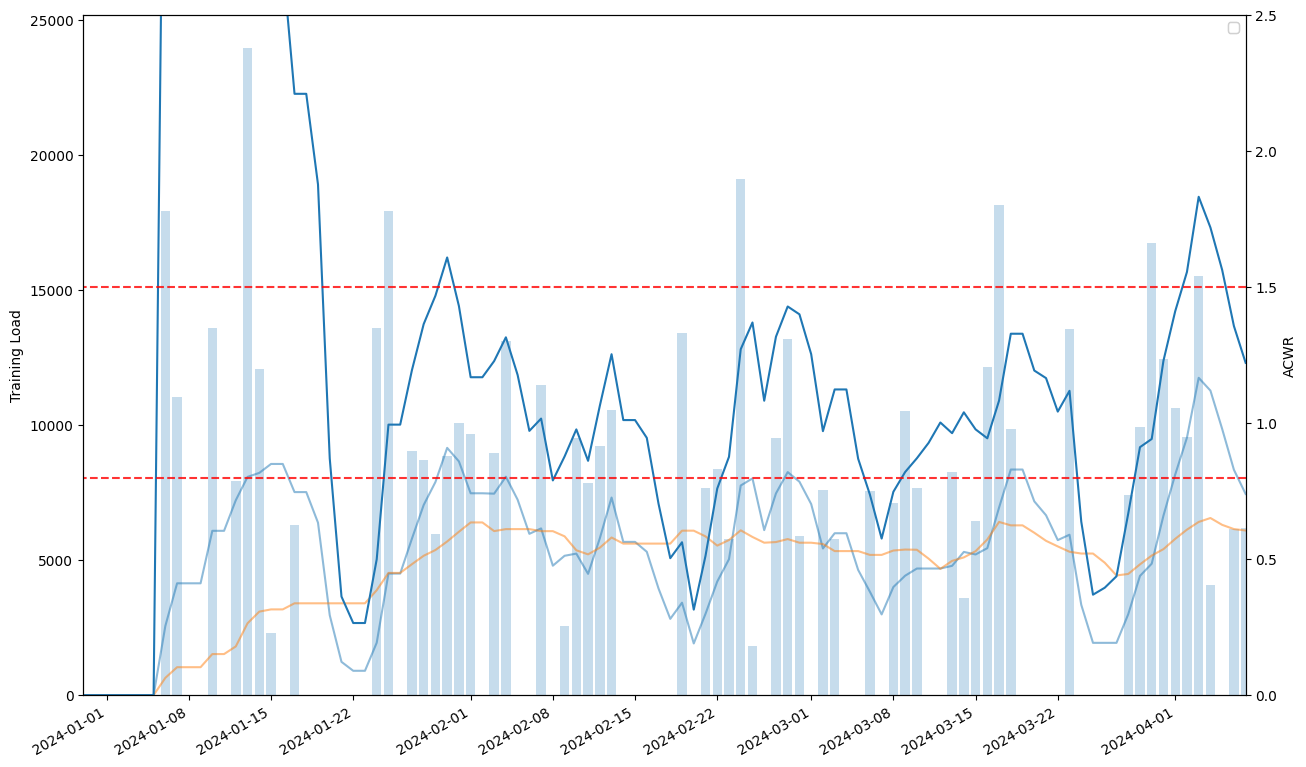

In [79]:
fig = plotACWR(acwrDaily.tail(100).reset_index(), 'start_date')

In [71]:
fig.savefig("acwr.png")

### Duration Vs Modality

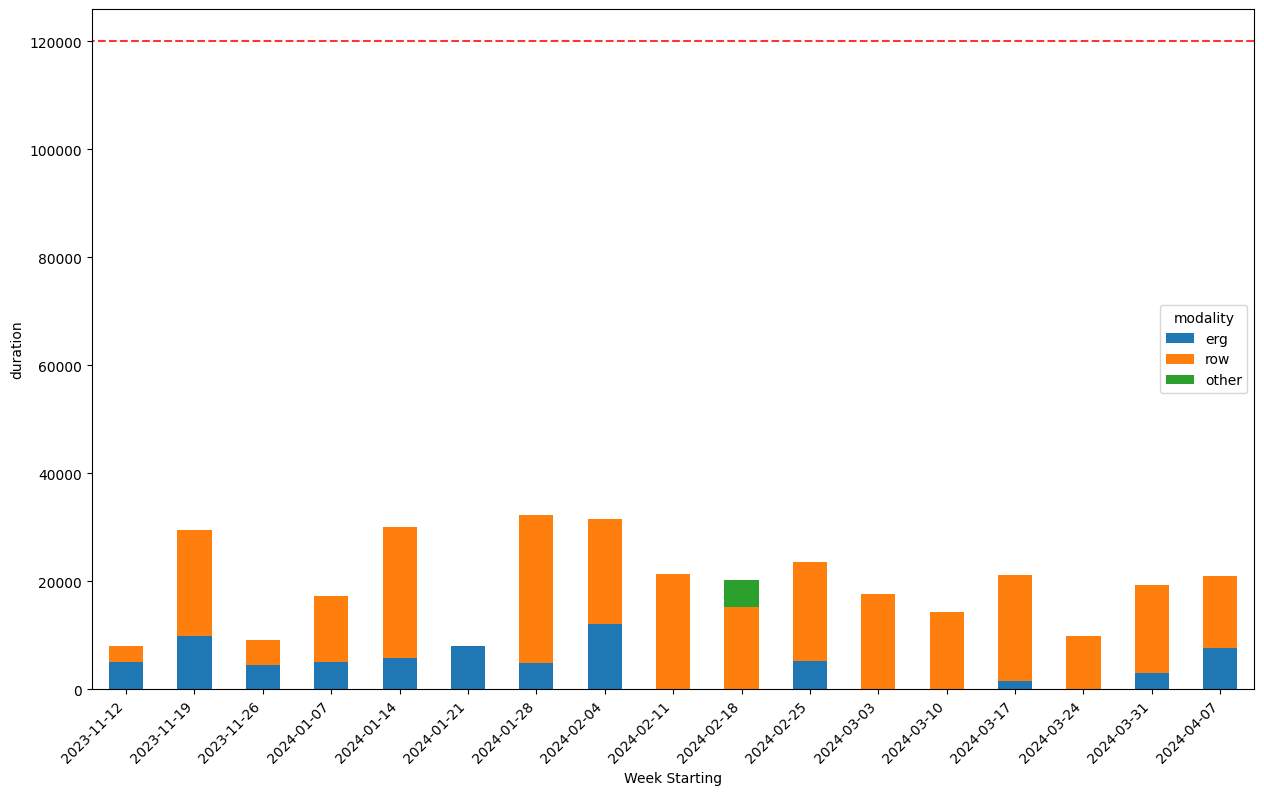

In [95]:
# weeklyModTime.plot(kind="bar", x="start_date", y=["erg", "row", "other"], stacked=True, xlabel="Week Starting", ylabel="duration")
import matplotlib.ticker as mticker
# fig, ax = plt.subplots(figsize=(15,10))
# ax.bar(weeklyModTime['start_date'], weeklyModTime[["erg", "row", "other"]], stacked=True)
# pd.to_datetime(weeklyModTime['start_date'])

def plotModality(df, ylabel, dateIdx="start_date"):
  fig, ax1 = plt.subplots(figsize=(15,10))
  # ax2 = plt.twinx(ax = ax1)

  dates = df[dateIdx]

  df.plot(ax=ax1, kind="bar", x="start_date", y=["erg", "row", "other"], stacked=True, xlabel="Week Starting", ylabel=ylabel)
  # ax1.bar(dates, timeDf[["erg", "row", "other"]], stacked=True)
  # ax2.bar(dates, df[["erg", "row", "other"]], stacked=True)
  # ax.set_xticklabels([date.strftime('%b %d') for date in ax.get_xticks()])
  ticklabels = ['']*len(df)
  skip = len(df)//12
  ticklabels[::skip] = df['start_date'].iloc[::skip].dt.strftime('%Y-%m-%d')
  ax1.xaxis.set_major_formatter(mticker.FixedFormatter(ticklabels))

  xlim = plt.xlim()
  plt.plot([xlim[len(xlim)-1], xlim[len(xlim)-1], xlim[0]], [120000, 120000, 120000], "r--", alpha=0.8)
  # distanceDf.plot(ax=ax2, kind="line", x="start_date", y="total")
  # ax2.plot(dates, distanceDf['total'])

  # Rotate the x labels for better visibility
  fig.autofmt_xdate(rotation=45)
  

  # Show the plot
  plt.show()
  return fig

durationFig = plotModality(weeklyModTime, "duration")

In [ ]:
durationFig.savefig("durationVsMod.png")

### Distance vs Modality

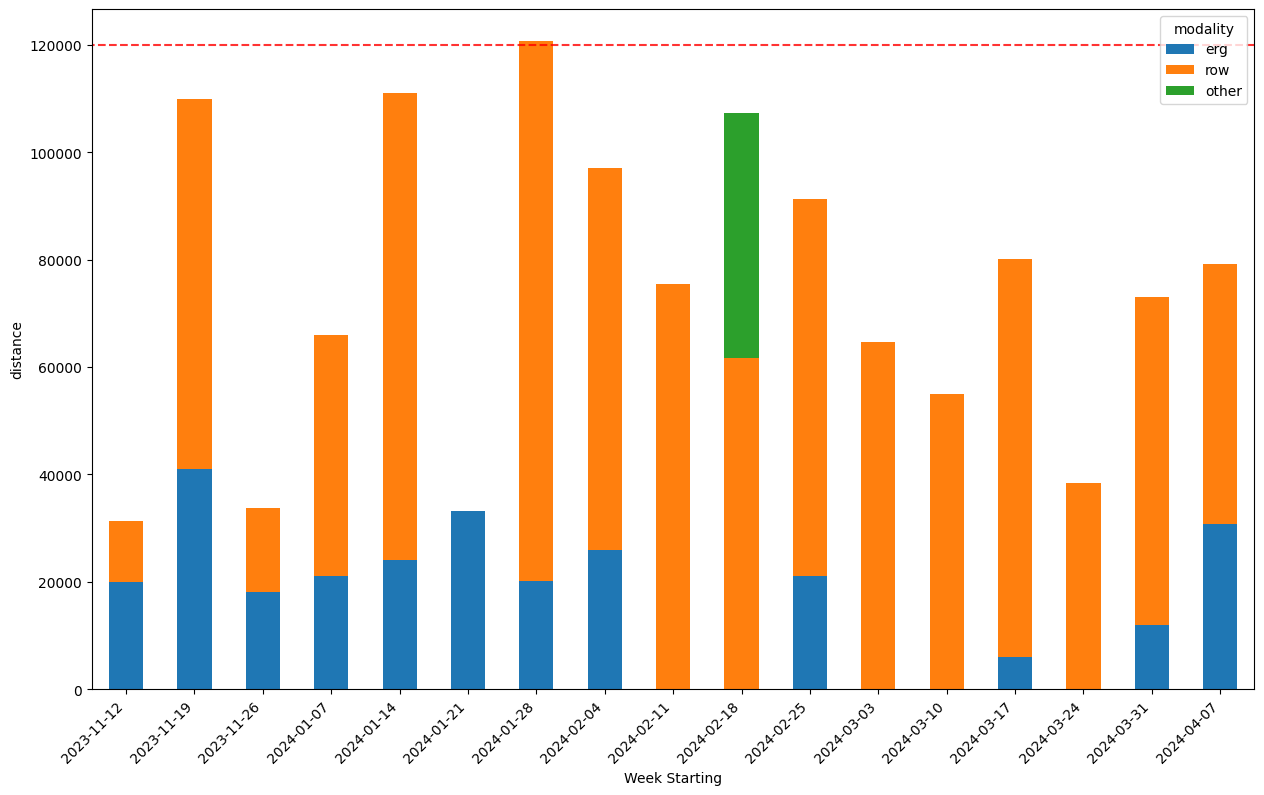

In [96]:
distanceFig = plotModality(weeklyModDist, "distance")

In [97]:
distanceFig.savefig("distanceVsMod.png")

### Modality Donut Chart

In [ ]:
weeklyModTime.iloc[-1][['erg', 'row', 'other']]

modality
erg       7602.0
row      13388.0
other        0.0
Name: 16, dtype: object

In [81]:
# to make the pie chart we need to restructure the data
data = weeklyModTime.iloc[-1][['erg', 'row','other']]

In [82]:
data[data > 0]

modality
erg     7602.0
row    13388.0
Name: 16, dtype: object

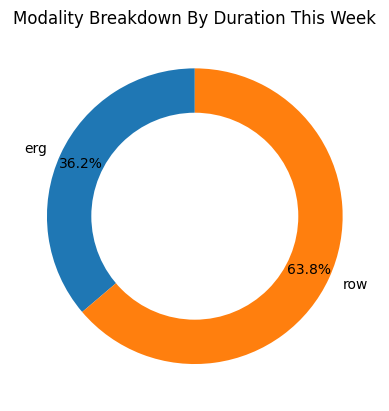

In [90]:
def plotModDurationDonut(data, metric="Duration"):
  plt.pie(x=data, # explode=np.full(len(data), 0.05),
          labels=data.index, autopct='%1.1f%%', pctdistance=0.85, startangle=90)
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()
  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)

  # Adding Title of chart
  plt.title('Modality Breakdown By '+metric+' This Week')

  # Displaying Chart
  plt.show()

  return fig

durationDonutFig = plotModDurationDonut(data[data>0])

In [91]:
durationDonutFig.savefig("durationDonut.png")

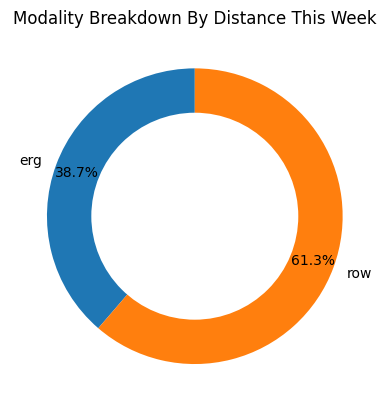

In [92]:
distData =weeklyModDist.iloc[-1][['erg', 'row', 'other']]
distanceDonutFig = plotModDurationDonut(distData[distData > 0], metric="Distance")

In [93]:
distanceDonutFig.savefig("distanceDonut.png")

In [94]:
weeklyModDist.iloc[-1]

modality
start_date    2024-04-07 00:00:00+00:00
erg                             30663.7
other                               0.0
row                             48613.9
total                           79277.6
Name: 16, dtype: object